In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from preprocessing_functions import *
import spacy

In [3]:
df_post_asthma = pd.read_csv("./Data_asthma/Official/df_post_off.csv")
df_com_asthma = pd.read_csv("./Data_asthma/Official/df_com_off.csv")

In [54]:
df_post_asthma.head()

,title,text,author,likes,time,id,url,replies
0,How can asthma breathlessness be diagnosed? Is...,I need help as my daughter suffers with severe...,My_fairy,Like (3),"Friday, July 21st, 2023 9:57 AM",p_0,https://healthunlocked.com/asthmalunguk-asthma...,0 Replies
1,Could this be steroid damage?,"Hi, Today my big toe got briefly caught in som...",Wheezycat,Like (2),"Thursday, July 20th, 2023 7:13 PM",p_1,https://healthunlocked.com/asthmalunguk-asthma...,0 Replies
2,"I just want to know, is it just me?",Am I the only one to have a hard time breathin...,Hidden,Like (0),"Thursday, July 20th, 2023 6:41 AM",p_2,https://healthunlocked.com/asthmalunguk-asthma...,0 Replies
3,Trimbow,I'm starting Trimbow today. Is anyone else on ...,PaulRosedene,Like (0),"Thursday, July 20th, 2023 5:46 AM",p_3,https://healthunlocked.com/asthmalunguk-asthma...,0 Replies
4,Infuriating Asthma Appointment,So i had a follow-up appointment with my asthm...,Lilmix03,Like (1),"Wednesday, July 19th, 2023 11:23 AM",p_4,https://healthunlocked.com/asthmalunguk-asthma...,0 Replies


In [55]:
df_com_asthma.head()

,text,author,likes,time,id,parent_id,url
0,[It has been diagnosed that my breathlessness ...,Homely2,(1),"Friday, July 21st, 2023 12:02 PM",tc_0,p_0,https://healthunlocked.com/asthmalunguk-asthma...
1,Thanks for detailed reply,My_fairy,(0),"Saturday, July 22nd, 2023 8:46 AM",s_0,tc_0,https://healthunlocked.com/asthmalunguk-asthma...
2,[Good morning My_fairy. I was diagnosed as hav...,Bingo88,(1),"Saturday, July 22nd, 2023 5:41 AM",tc_1,p_0,https://healthunlocked.com/asthmalunguk-asthma...
3,thanks Brian yes she did have bloods and I bel...,My_fairy,(1),"Saturday, July 22nd, 2023 8:48 AM",s_1,tc_1,https://healthunlocked.com/asthmalunguk-asthma...
4,Not sure sorry I was just told there was signs...,Bingo88,(1),"Sunday, July 23rd, 2023 6:58 AM",s_2,s_1,https://healthunlocked.com/asthmalunguk-asthma...


## Clean df post

In [57]:
df_post_asthma["replies"] = df_post_asthma["replies"].str.split().str[0]
df_post_asthma["replies"] = pd.to_numeric(df_post_asthma["replies"])
df_post_asthma["time"] = pd.to_datetime(df_post_asthma["time"])
df_post_asthma["likes"] = pd.to_numeric(df_post_asthma["likes"].str.split().str[1].str.replace("(", "").str.replace(")",""))

<ipython-input-57-fa7cc91b9645>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_post_asthma["likes"] = pd.to_numeric(df_post_asthma["likes"].str.split().str[1].str.replace("(", "").str.replace(")",""))


In [58]:
df_post_asthma.shape

(9657, 8)

In [59]:
print(df_post_asthma["time"].min())
df_post_asthma["time"].max()

2016-01-13 12:47:00


Timestamp('2023-07-21 09:57:00')

In [60]:
df_post_asthma.head()

,title,text,author,likes,time,id,url,replies
0,How can asthma breathlessness be diagnosed? Is...,I need help as my daughter suffers with severe...,My_fairy,3,2023-07-21 09:57:00,p_0,https://healthunlocked.com/asthmalunguk-asthma...,0
1,Could this be steroid damage?,"Hi, Today my big toe got briefly caught in som...",Wheezycat,2,2023-07-20 19:13:00,p_1,https://healthunlocked.com/asthmalunguk-asthma...,0
2,"I just want to know, is it just me?",Am I the only one to have a hard time breathin...,Hidden,0,2023-07-20 06:41:00,p_2,https://healthunlocked.com/asthmalunguk-asthma...,0
3,Trimbow,I'm starting Trimbow today. Is anyone else on ...,PaulRosedene,0,2023-07-20 05:46:00,p_3,https://healthunlocked.com/asthmalunguk-asthma...,0
4,Infuriating Asthma Appointment,So i had a follow-up appointment with my asthm...,Lilmix03,1,2023-07-19 11:23:00,p_4,https://healthunlocked.com/asthmalunguk-asthma...,0


### DF COM

In [61]:
df_com_asthma = df_com_asthma.apply(sistema_tc_parentesi, axis = 1)
df_com_asthma["time"] = pd.to_datetime(df_com_asthma["time"])
df_com_asthma["likes"] = df_com_asthma["likes"].str.replace("(", "").str.replace(")","")

<ipython-input-61-eae948048bce>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_com_asthma["likes"] = df_com_asthma["likes"].str.replace("(", "").str.replace(")","")


In [62]:
df_com_asthma.head()

,text,author,likes,time,id,parent_id,url
0,It has been diagnosed that my breathlessness i...,Homely2,1,2023-07-21 12:02:00,tc_0,p_0,https://healthunlocked.com/asthmalunguk-asthma...
1,Thanks for detailed reply,My_fairy,0,2023-07-22 08:46:00,s_0,tc_0,https://healthunlocked.com/asthmalunguk-asthma...
2,Good morning My_fairy. I was diagnosed as havi...,Bingo88,1,2023-07-22 05:41:00,tc_1,p_0,https://healthunlocked.com/asthmalunguk-asthma...
3,thanks Brian yes she did have bloods and I bel...,My_fairy,1,2023-07-22 08:48:00,s_1,tc_1,https://healthunlocked.com/asthmalunguk-asthma...
4,Not sure sorry I was just told there was signs...,Bingo88,1,2023-07-23 06:58:00,s_2,s_1,https://healthunlocked.com/asthmalunguk-asthma...


In [63]:
df_com_asthma.shape

(87021, 7)

In [64]:
print(df_com_asthma["time"].min())
df_com_asthma["time"].max()

2016-01-13 12:52:00


Timestamp('2023-10-31 22:43:00')

### Data lungs

In [15]:
# df_com_lun = pd.read_csv("./Data_lungs/df_com.csv")
# df_post_lun.read_csv("./Data_lungs/df_post.csv")

In [16]:
df_posts_lun.head()

,title,text,author,likes,time,id,url,replies
0,Rituximab or Cyclophosphamide,HiI have PF caused by mixed connective tissue ...,Barnesy77,Like (1),"Friday, December 15th, 2017 3:09 PM",p_0,https://healthunlocked.com/asthmalunguk-lung/p...,0 Replies
1,Respiratory clinic.,"Hi everyone hope you are well, and keeping war...",Damon1864,Like (9),"Friday, December 15th, 2017 1:21 PM",p_1,https://healthunlocked.com/asthmalunguk-lung/p...,0 Replies
2,Back trouble.,We write about all sorts of ailsBut one I've n...,Hidden,Like (18),"Friday, December 15th, 2017 1:11 PM",p_2,https://healthunlocked.com/asthmalunguk-lung/p...,0 Replies
3,Dr. Summerskill.,Thank you Doctor SummerskillI suspect I owe yo...,Hidden,Like (14),"Friday, December 15th, 2017 12:43 PM",p_3,https://healthunlocked.com/asthmalunguk-lung/p...,0 Replies
4,Hi,Simply to introduce myself as a new member here.,Clarissa2000,Like (4),"Friday, December 15th, 2017 8:43 AM",p_4,https://healthunlocked.com/asthmalunguk-lung/p...,0 Replies


In [18]:
df_com_lun.head()

,text,author,likes,time,id,parent_id,url
0,[I had rituximab about three years ago for rhu...,ChaOliver,(1),"Saturday, December 16th, 2017 5:50 AM",tc_0,p_0,https://healthunlocked.com/asthmalunguk-lung/p...
1,"Thanks ChaOliver, glad to hear that there were...",Barnesy77,(0),"Sunday, December 17th, 2017 10:40 AM",s_0,tc_0,https://healthunlocked.com/asthmalunguk-lung/p...
2,[I have had both. I started on cyclophosphamid...,AngieB72,(2),"Saturday, December 16th, 2017 7:30 AM",tc_1,p_0,https://healthunlocked.com/asthmalunguk-lung/p...
3,Hi AngieB72. I'm sorry that your gas transfer ...,Barnesy77,(0),"Sunday, December 17th, 2017 10:43 AM",s_1,tc_1,https://healthunlocked.com/asthmalunguk-lung/p...
4,"[Hi, I also have the same diagnosis as you sin...",Maureenpearl,(0),"Saturday, December 16th, 2017 11:31 PM",tc_2,p_0,https://healthunlocked.com/asthmalunguk-lung/p...


In [22]:
df_posts_lun.duplicated().any()

False

In [21]:
df_com_lun.duplicated().any()

False

In [23]:
print(df_posts_lun.shape)
df_com_lun.shape

(26021, 8)


(384977, 7)

### Cleaning df post

In [26]:
df_posts_lun["replies"] = df_posts_lun["replies"].str.split().str[0]
df_posts_lun["replies"] = pd.to_numeric(df_posts_lun["replies"])
df_posts_lun["time"] = pd.to_datetime(df_posts_lun["time"])
df_posts_lun["likes"] = pd.to_numeric(df_posts_lun["likes"].str.split().str[1].str.replace("(", "").str.replace(")",""))

<ipython-input-26-b896bf28c388>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_posts_lun["likes"] = pd.to_numeric(df_posts_lun["likes"].str.split().str[1].str.replace("(", "").str.replace(")",""))


In [31]:
df_posts_lun.head()

,title,text,author,likes,time,id,url,replies
0,Rituximab or Cyclophosphamide,HiI have PF caused by mixed connective tissue ...,Barnesy77,1,2017-12-15 15:09:00,p_0,https://healthunlocked.com/asthmalunguk-lung/p...,0
1,Respiratory clinic.,"Hi everyone hope you are well, and keeping war...",Damon1864,9,2017-12-15 13:21:00,p_1,https://healthunlocked.com/asthmalunguk-lung/p...,0
2,Back trouble.,We write about all sorts of ailsBut one I've n...,Hidden,18,2017-12-15 13:11:00,p_2,https://healthunlocked.com/asthmalunguk-lung/p...,0
3,Dr. Summerskill.,Thank you Doctor SummerskillI suspect I owe yo...,Hidden,14,2017-12-15 12:43:00,p_3,https://healthunlocked.com/asthmalunguk-lung/p...,0
4,Hi,Simply to introduce myself as a new member here.,Clarissa2000,4,2017-12-15 08:43:00,p_4,https://healthunlocked.com/asthmalunguk-lung/p...,0


In [28]:
print(df_posts_lun["time"].min())
df_posts_lun["time"].max()

2016-01-02 11:25:00


Timestamp('2023-07-24 06:54:00')

### Df com

In [29]:
df_com_lun = df_com_lun.apply(sistema_tc_parentesi, axis = 1)
df_com_lun["time"] = pd.to_datetime(df_com_lun["time"])
df_com_lun["likes"] = pd.to_numeric(df_com_lun["likes"].str.replace("(", "").str.replace(")",""))

<ipython-input-29-756c88caae66>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_com_lun["likes"] = df_com_lun["likes"].str.replace("(", "").str.replace(")","")


In [30]:
print(df_com_lun["time"].min())
df_com_lun["time"].max()

2016-01-02 11:50:00


Timestamp('2023-10-31 05:51:00')

In [32]:
df_com_lun.head()

,text,author,likes,time,id,parent_id,url
0,I had rituximab about three years ago for rhue...,ChaOliver,1,2017-12-16 05:50:00,tc_0,p_0,https://healthunlocked.com/asthmalunguk-lung/p...
1,"Thanks ChaOliver, glad to hear that there were...",Barnesy77,0,2017-12-17 10:40:00,s_0,tc_0,https://healthunlocked.com/asthmalunguk-lung/p...
2,I have had both. I started on cyclophosphamide...,AngieB72,2,2017-12-16 07:30:00,tc_1,p_0,https://healthunlocked.com/asthmalunguk-lung/p...
3,Hi AngieB72. I'm sorry that your gas transfer ...,Barnesy77,0,2017-12-17 10:43:00,s_1,tc_1,https://healthunlocked.com/asthmalunguk-lung/p...
4,"Hi, I also have the same diagnosis as you sinc...",Maureenpearl,0,2017-12-16 23:31:00,tc_2,p_0,https://healthunlocked.com/asthmalunguk-lung/p...


### Check duplicates

In [38]:
df_post_a.isna().any().sum()

0

In [29]:
df_com_a[df_com_a.isna().any(axis = 1)]

,text,author,likes,time,id,parent_id,url,target,text_processed
52191,NaN,frenchliz,0,2019-01-13 17:50:00,f_7827,s_18741,https://healthunlocked.com/asthmalunguk-asthma...,Oldandgray,NaN
59175,NaN,-Butterfly-,0,2018-07-11 22:02:00,s_21090,s_21089,https://healthunlocked.com/asthmalunguk-asthma...,Memoc,NaN
59357,NaN,Findingwhatworks26,1,2018-07-14 22:23:00,f_9173,f_9172,https://healthunlocked.com/asthmalunguk-asthma...,Eduardono,NaN


In [62]:
df_post_l[df_post_l.isna().any(axis = 1)]

,title,text,author,likes,time,id,url,replies
3829,For Cat People,NaN,moogle,18,2017-03-07 15:01:00,p_3829,https://healthunlocked.com/asthmalunguk-lung/p...,0
14167,New rapid test kits have now arrived from China.,NaN,2greys,21,2020-10-23 11:15:00,p_14167,https://healthunlocked.com/asthmalunguk-lung/p...,0


In [63]:
df_com_l[df_com_l.isna().any(axis = 1)]

,text,author,likes,time,id,parent_id,url,target
7579,NaN,mellyme,0,2017-11-01 02:00:00,s_2720,s_2719,https://healthunlocked.com/asthmalunguk-lung/p...,Jolyn
7619,NaN,O2Trees,0,2017-10-30 22:28:00,f_959,f_958,https://healthunlocked.com/asthmalunguk-lung/p...,helingmic
14111,NaN,mrsmummy,2,2017-09-26 17:19:00,tc_7334,p_1156,https://healthunlocked.com/asthmalunguk-lung/p...,Hidden
14291,NaN,Lin76,2,2017-09-25 20:15:00,s_5068,s_5068,https://healthunlocked.com/asthmalunguk-lung/p...,Lin76
14294,NaN,mrsmummy,1,2017-09-25 20:16:00,s_5071,s_5070,https://healthunlocked.com/asthmalunguk-lung/p...,skischool
...,...,...,...,...,...,...,...,...
380475,NaN,mellyme,1,2018-01-10 23:39:00,s_133703,tc_204477,https://healthunlocked.com/asthmalunguk-lung/p...,BillBruce
380483,NaN,mellyme,0,2018-01-12 00:23:00,tc_204484,p_25582,https://healthunlocked.com/asthmalunguk-lung/p...,mellyme
380999,NaN,mrsmummy,1,2018-01-09 18:15:00,tc_204830,p_25625,https://healthunlocked.com/asthmalunguk-lung/p...,Trout
381395,NaN,mrsmummy,2,2018-01-06 11:40:00,tc_205040,p_25669,https://healthunlocked.com/asthmalunguk-lung/p...,Dmactds


In [71]:
df_com_a = df_com_a.dropna()
df_post_l = df_post_l.dropna()
df_com_l = df_com_l.dropna()

In [83]:
# df_com_lun.to_csv("./Data_lungs/df_com_clean.csv", index = False)
# df_posts_lun.to_csv("./Data_lungs/df_post_clean.csv", index = False)
# df_post_asthma.to_csv("./Data_asthma/Official/df_post_off_clean.csv", index = False)
# df_com_asthma.to_csv("./Data_asthma/Official/df_com_off_clean.csv", index = False)

## Analisi esplorativa    (attenti a hidden)

### How many hidden are there

In [87]:
print(df_com_lun[df_com_lun["author"] == "Hidden"].shape)
print(df_posts_lun[df_com_lun["author"] == "Hidden"].shape)
print(df_com_asthma[df_com_lun["author"] == "Hidden"].shape)
print(df_post_asthma[df_com_lun["author"] == "Hidden"].shape)

(42047, 7)
(5067, 8)
(13485, 7)
(2104, 8)


<ipython-input-87-d9732d738b4a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_posts_lun[df_com_lun["author"] == "Hidden"].shape)
<ipython-input-87-d9732d738b4a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_com_asthma[df_com_lun["author"] == "Hidden"].shape)
<ipython-input-87-d9732d738b4a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_post_asthma[df_com_lun["author"] == "Hidden"].shape)


## Data analysis

In [2]:
df_post_a = pd.read_csv("./Data_asthma/Official/df_post_off_clean.csv", parse_dates = ["time"])
df_com_a = pd.read_csv("./Data_asthma/Official/df_com_off_clean.csv", parse_dates = ["time"])
df_post_l = pd.read_csv("./Data_lungs/df_post_clean.csv", parse_dates = ["time"])
df_com_l = pd.read_csv("./Data_lungs/df_com_clean.csv", parse_dates = ["time"])

In [3]:
print("          Post Asthma")
statistics(df_post_a)

print("\n          Comments Asthma")
statistics(df_com_a)

print("\n          Post Lungs")
statistics(df_post_l)

print("\n          Comments Lungs")
statistics(df_com_l)


          Post Asthma
La lunghezza media dei commenti è: 680.9 con deviazione standard 803.15 
la media dei likes è 0.82 con std di 2.06

          Comments Asthma
La lunghezza media dei commenti è: 379.1 con deviazione standard 430.63 
la media dei likes è 0.69 con std di 1.1

          Post Lungs
La lunghezza media dei commenti è: 538.99 con deviazione standard 676.23 
la media dei likes è 6.1 con std di 9.27

          Comments Lungs
La lunghezza media dei commenti è: 226.98 con deviazione standard 288.86 
la media dei likes è 1.22 con std di 1.88


In [6]:
print("\n          Comments Asthma")
count_type_comments(df_com_a)

print("\n          Comments Lungs")
count_type_comments(df_com_l)


          Comments Asthma
top comments: 45240       sub comments: 29925        full indent: 11856

          Comments Lungs
top comments: 207156       sub comments: 135175        full indent: 42646


(207156, 135175, 42646)

In [7]:
print("          Post Asthma")
n_authors(df_post_a)

print("\n          Comments Asthma")
n_authors(df_com_a)

print("\n          Post Lungs")
n_authors(df_post_l)

print("\n          Comments Lungs")
n_authors(df_com_l)

          Post Asthma
The dataframe contains 3198 authors

          Comments Asthma
The dataframe contains 4490 authors

          Post Lungs
The dataframe contains 6528 authors

          Comments Lungs
The dataframe contains 9210 authors


In [91]:
print("          Post Asthma")
max_min_date(df_post_a)

print("\n          Comments Asthma")
max_min_date(df_com_a)

print("\n          Post Lungs")
max_min_date(df_post_l)

print("\n          Comments Lungs")
max_min_date(df_com_l)


          Post Asthma
The dataframe contains data which range from 2016-01-13 12:47:00 to 2023-07-21 09:57:00

          Comments Asthma
The dataframe contains data which range from 2016-01-13 12:52:00 to 2023-10-31 22:43:00

          Post Lungs
The dataframe contains data which range from 2016-01-02 11:25:00 to 2023-07-24 06:54:00

          Comments Lungs
The dataframe contains data which range from 2016-01-02 11:50:00 to 2023-10-31 05:51:00


### Text preprocessing

In [4]:
def processing(df):
    df["text_processed"] = df.text.str.lower()  
    df["text_processed"] = df["text_processed"].apply(remove_whitespaces)
    df["text_processed"] = df["text_processed"].apply(remove_links)
    df["text_processed"] = df["text_processed"].apply(remove_emoji)
    df["text_processed"] = df["text_processed"].apply(remove_com)
    df["text_processed"] = df["text_processed"].apply(remove_punctuation)
    df["text_processed"] = df["text_processed"].apply(removing_character_repetition)
    df["text_processed"] = df["text_processed"].apply(tokenizer)
    df["text_processed"] = df["text_processed"].apply(remove_stopwords)
    df = df.join(lemmatize(df))
    return df

In [84]:
# df_post_a = processing(df_post_a)
df_com_a = processing(df_com_a)
df_post_l = processing(df_post_l)
df_com_l = processing(df_com_l)

<ipython-input-4-d2655db17f4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_processed"] = df.text.str.lower()
<ipython-input-4-d2655db17f4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_processed"] = df["text_processed"].apply(remove_whitespaces)
<ipython-input-4-d2655db17f4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [87]:
df_com_a

,text,author,likes,time,id,parent_id,url,target,text_processed,text_lemmatised
0,It has been diagnosed that my breathlessness i...,Homely2,1,2023-07-21 12:02:00,tc_0,p_0,https://healthunlocked.com/asthmalunguk-asthma...,My_fairy,diagnosed breathlessness asthma related four t...,"[diagnose, breathlessness, asthma, relate, tim..."
1,Thanks for detailed reply,My_fairy,0,2023-07-22 08:46:00,s_0,tc_0,https://healthunlocked.com/asthmalunguk-asthma...,Homely2,thanks detailed reply,"[thank, detailed, reply]"
2,Good morning My_fairy. I was diagnosed as havi...,Bingo88,1,2023-07-22 05:41:00,tc_1,p_0,https://healthunlocked.com/asthmalunguk-asthma...,My_fairy,good morning myfairy diagnosed asthma markers ...,"[good, morning, myfairy, diagnose, asthma, mar..."
3,thanks Brian yes she did have bloods and I bel...,My_fairy,1,2023-07-22 08:48:00,s_1,tc_1,https://healthunlocked.com/asthmalunguk-asthma...,Bingo88,thanks brian yes bloods believe shows asthma m...,"[thank, brian, yes, blood, believe, show, asth..."
4,Not sure sorry I was just told there was signs...,Bingo88,1,2023-07-23 06:58:00,s_2,s_1,https://healthunlocked.com/asthmalunguk-asthma...,My_fairy,sure sorry told signs asthma blood markers tes...,"[sure, sorry, tell, sign, asthma, blood, marke..."
...,...,...,...,...,...,...,...,...,...,...
87013,"Glad for you Tracy 1972, have yourself some re...",josephantoine,0,2016-01-13 13:35:00,tc_45235,p_9656,https://healthunlocked.com/asthmalunguk-asthma...,Tracey1972,glad tracy 1972 relaxing moments,"[glad, tracy, 1972, relax, moment]"
87014,So pleased to hear this Tracey. Do take care ...,MaggieHP,0,2016-01-13 14:00:00,tc_45236,p_9656,https://healthunlocked.com/asthmalunguk-asthma...,Tracey1972,pleased hear tracey care though wont pamper,"[pleased, hear, tracey, care, not, pamp]"
87015,Great news Tracey keep well ♥♥♥,starveycat,0,2016-01-13 15:00:00,tc_45237,p_9656,https://healthunlocked.com/asthmalunguk-asthma...,Tracey1972,great news tracey keep,"[great, news, tracey]"
87016,So pleased for you. Take lots of care xxxx,Karjade,0,2016-01-13 16:55:00,tc_45238,p_9656,https://healthunlocked.com/asthmalunguk-asthma...,Tracey1972,pleased lots care xx,"[please, lot, care, xx]"


In [88]:
# df_com_l.to_csv("./Data_lungs/df_com_clean.csv", index = False)
# df_post_l.to_csv("./Data_lungs/df_post_clean.csv", index = False)
# df_post_a.to_csv("./Data_asthma/Official/df_post_off_clean.csv", index = False)
# df_com_a.to_csv("./Data_asthma/Official/df_com_off_clean.csv", index = False)

### Find recipients

In [85]:
author = list()
recipient = list()
date = list()

In [86]:
def find_arch(row):
    parent_id = row.parent_id
    author.append(row.author)
    if df_com_a[df_com_a["id"] == parent_id].shape[0] == 0:
        recipient.append(df_post_a[df_post_a["id"] == parent_id].author.item())
    else:
        recipient.append(df_com_a[df_com_a["id"] == parent_id].author.item())
    date.append(row.time)
    return 

In [29]:
def find_recipient_asthma(row):
#     global i
#     i+=1
#     print(i, end = "\r")
    parent_id = row.parent_id
    elif df_com_a[df_com_a["id"] == parent_id].shape[0] == 0:
        recipient = df_post_a[df_post_a["id"] == parent_id].author.item()
    else:
        recipient = df_com_a[df_com_a["id"] == parent_id].author.item()
    return recipient

def find_recipient_lungs(row):
#     global i
#     i+=1
#     print(i, end = "\r")
    parent_id = row.parent_id
    if parent_id == "tc_59035":
        return None
    elif df_com_l[df_com_l["id"] == parent_id].shape[0] == 0:
        recipient = df_post_l[df_post_l["id"] == parent_id].author.item()
    else:
        recipient = df_com_l[df_com_l["id"] == parent_id].author.item()
    return recipient

In [ ]:
df_com_a["target"] = df_com_a.apply(find_recipient, axis = 1)
df_com_l["target"] = df_com_l.apply(find_recipient, axis = 1)

In [35]:
#df_com_a.to_csv("./Data_asthma/Official/df_com_off_clean.csv", index = False)
# df_com_l.to_csv("./Data_lungs/df_com_clean.csv", index = False)

### Sentiment

In [ ]:
df_a_su_u = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_a_type_interaction_su_u.csv", parse_dates = ["time"])
df_a_u_u = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_a_type_interaction_user_user.csv", parse_dates = ["time"])
df_l_su_u = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_lungs_type_interaction.csv", parse_dates = ["time"])
df_l_u_u = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_lungs_type_interaction_user_user_total.csv",  parse_dates = ["time"])

In [ ]:
plot_a_tot = prepare_df_sentiment_hist_series(pd.concat([df_a_su_u, df_a_u_u], ignore_index = True))
plot_l_tot = prepare_df_sentiment_hist_series(pd.concat([df_l_su_u, df_l_u_u], ignore_index = True))

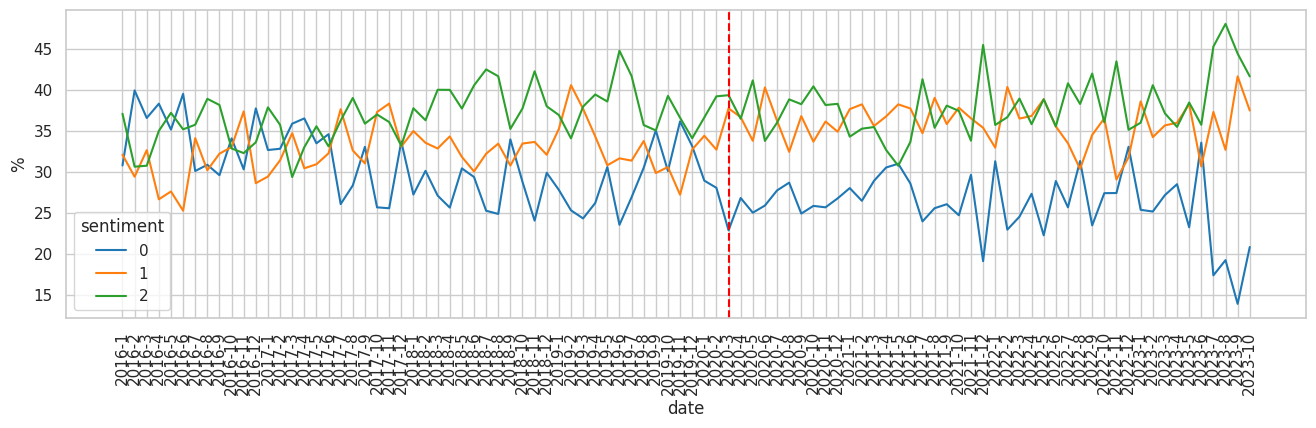

In [ ]:
sns.set(rc= {'figure.figsize':(16,4)})
sns.set_style("whitegrid")
sns.color_palette("Paired")
g = sns.lineplot(data = plot_a_tot, x = 'date', y = '%', hue = 'sentiment', palette= "tab10")
plt.xticks(rotation=90)
g.axvline(x=50, color='red', linestyle='--')

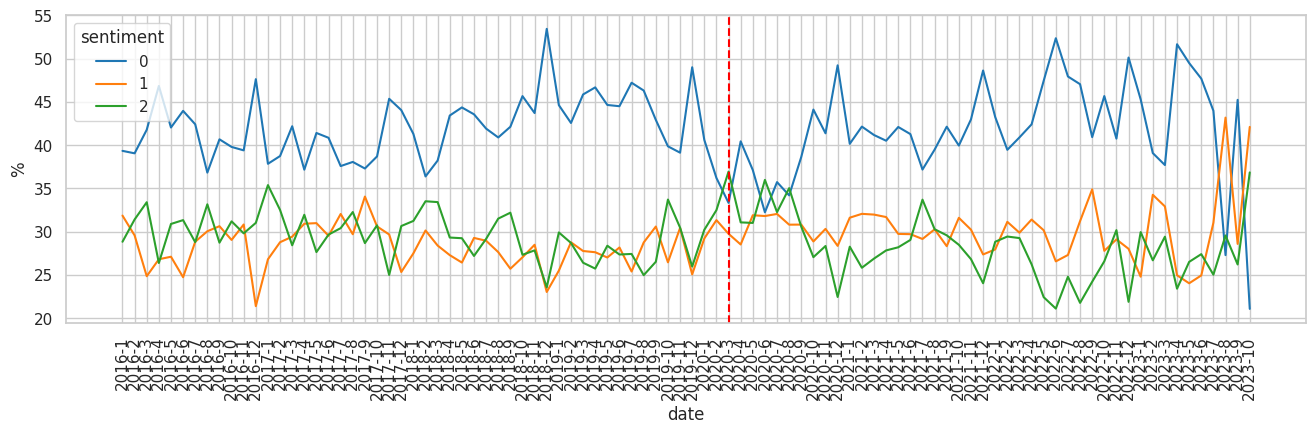

In [ ]:
sns.set(rc= {'figure.figsize':(16,4)})
sns.set_style("whitegrid")
sns.color_palette("Paired")
g = sns.lineplot(data = plot_l_tot, x = 'date', y = '%', hue = 'sentiment', palette= "tab10")
plt.xticks(rotation=90)
g.axvline(x = 50, color='red', linestyle='--')

In [ ]:
df_a_tot = pd.concat([df_a_su_u, df_a_u_u], ignore_index = True)
df_l_tot = pd.concat([df_l_su_u, df_l_u_u], ignore_index = True)

<Axes: xlabel='sentiment'>

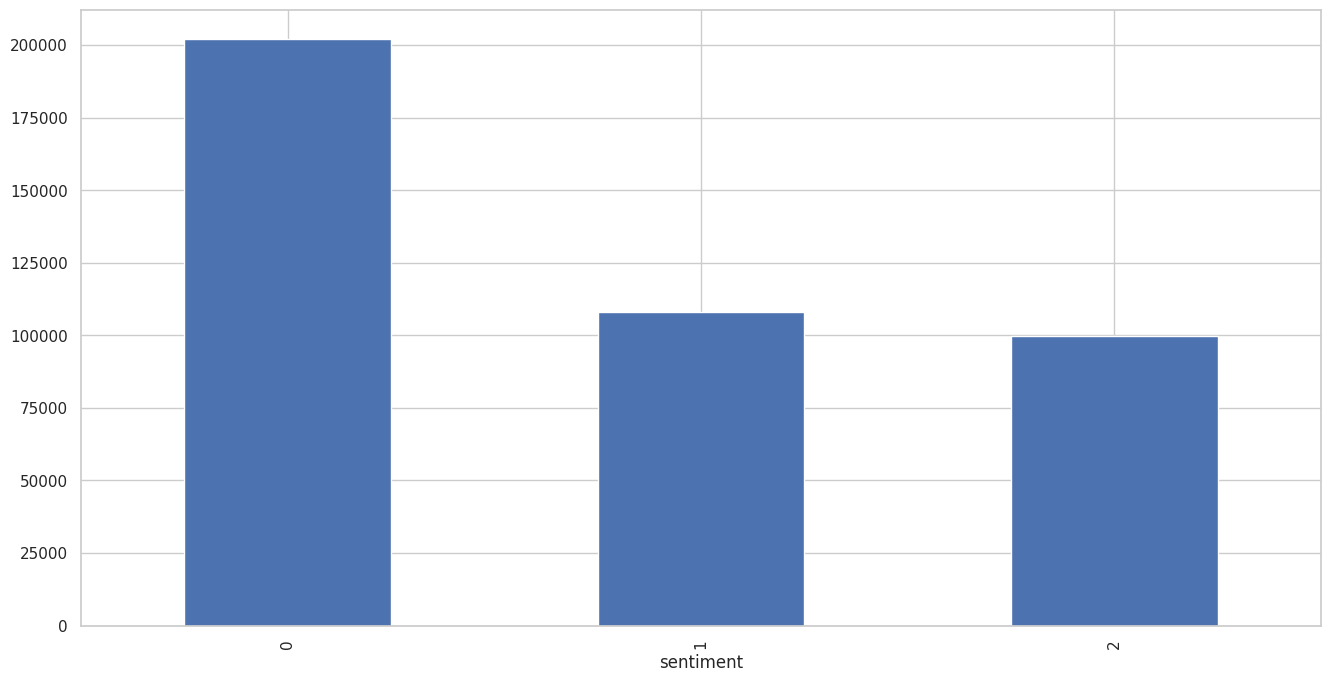

In [ ]:
df_l_tot[ ~ df_l_tot.duplicated("id")]["sentiment"].value_counts().plot.bar()  #remove duplicated posts used to detect sentiment shift

<Axes: xlabel='sentiment'>

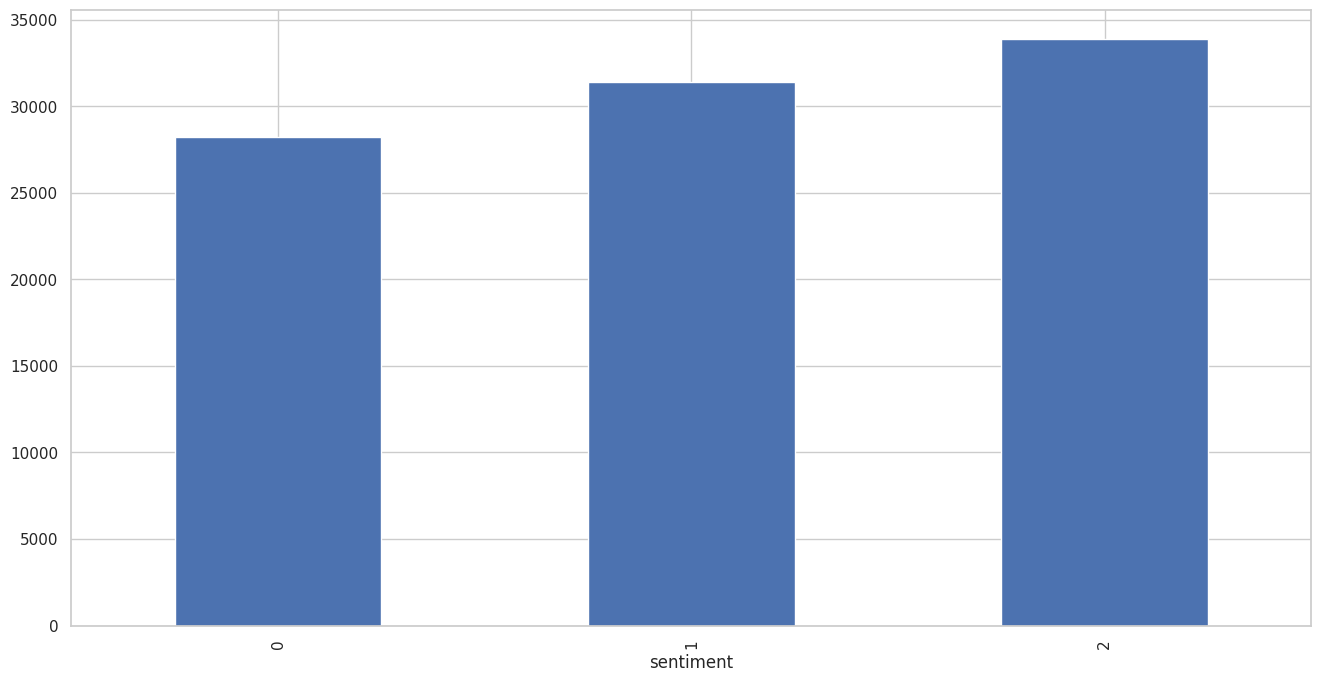

In [ ]:
df_a_tot[ ~ df_a_tot.duplicated("id")]["sentiment"].value_counts().sort_values().plot.bar() #remove duplicated posts used to detect sentiment shift

Example of sentiment for each community

In [ ]:
df_a_tot[df_a_tot.sentiment == 2].iloc[0].text

'I need help as my daughter suffers with severe breathlessness and also had breathlessness attacks which are asthma attacks. I need advice from anyone howto prove this to the medical team that this is asthma and very serious as you can’t take inhaler when you are having that severe breathlessness attack and could be deadly. '

In [ ]:
df_l_tot[df_l_tot.sentiment == 2].iloc[2013].text

'So we could end up waiting a week for an appointment that needed A&E to deal with straight away?  It does not make sense at all?I have had a couple of A&E visits that with out O2 straight away could of been fatal! '